2025-12-01 05:53:32.774195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764568412.796358     660 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764568412.803078     660 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 17654 files belonging to 15 classes.


I0000 00:00:1764568416.712758     660 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 3780 files belonging to 15 classes.
Found 3793 files belonging to 15 classes.
Epoch 1/6


E0000 00:00:1764568468.735597     660 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/efficientnetb1_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1764568491.181107     697 cuda_dnn.cc:529] Loaded cuDNN version 90300


552/552 ━━━━━━━━━━━━━━━━━━━━ 283s 384ms/step - accuracy: 0.4017 - loss: 2.1812 - val_accuracy: 0.6852 - val_loss: 1.3236
Epoch 2/6
552/552 ━━━━━━━━━━━━━━━━━━━━ 205s 372ms/step - accuracy: 0.6914 - loss: 1.3182 - val_accuracy: 0.7439 - val_loss: 1.1940
Epoch 3/6
552/552 ━━━━━━━━━━━━━━━━━━━━ 204s 370ms/step - accuracy: 0.7392 - loss: 1.1828 - val_accuracy: 0.7291 - val_loss: 1.1937
Epoch 4/6
552/552 ━━━━━━━━━━━━━━━━━━━━ 204s 370ms/step - accuracy: 0.7651 - loss: 1.1115 - val_accuracy: 0.7204 - val_loss: 1.2430
Epoch 5/6
552/552 ━━━━━━━━━━━━━━━━━━━━ 207s 374ms/step - accuracy: 0.7874 - loss: 1.0457 - val_accuracy: 0.7847 - val_loss: 1.0837
Epoch 6/6
552/552 ━━━━━━━━━━━━━━━━━━━━ 205s 371ms/step - accuracy: 0.7928 - loss: 1.0328 - val_accuracy: 0.7632 - val_loss: 1.1265
Epoch 1/15


E0000 00:00:1764569764.564706     660 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/efficientnetb1_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


552/552 ━━━━━━━━━━━━━━━━━━━━ 127s 160ms/step - accuracy: 0.8126 - loss: 0.7726 - val_accuracy: 0.8016 - val_loss: 0.8045
Epoch 2/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 85s 155ms/step - accuracy: 0.8329 - loss: 0.7258 - val_accuracy: 0.8019 - val_loss: 0.8096
Epoch 3/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 86s 156ms/step - accuracy: 0.8387 - loss: 0.7041 - val_accuracy: 0.8029 - val_loss: 0.8228
Epoch 4/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 85s 154ms/step - accuracy: 0.8507 - loss: 0.6848 - val_accuracy: 0.8053 - val_loss: 0.8114
Epoch 5/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 85s 155ms/step - accuracy: 0.8492 - loss: 0.6767 - val_accuracy: 0.8082 - val_loss: 0.8023
Epoch 6/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 85s 154ms/step - accuracy: 0.8836 - loss: 0.6051 - val_accuracy: 0.8066 - val_loss: 0.8469
Epoch 15/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 85s 154ms/step - accuracy: 0.8854 - loss: 0.6004 - val_accuracy: 0.8090 - val_loss: 0.8368
Validation Accuracy: 81.27% | Loss: 0.8967
Test Accuracy: 81.23% | Loss: 0.7777


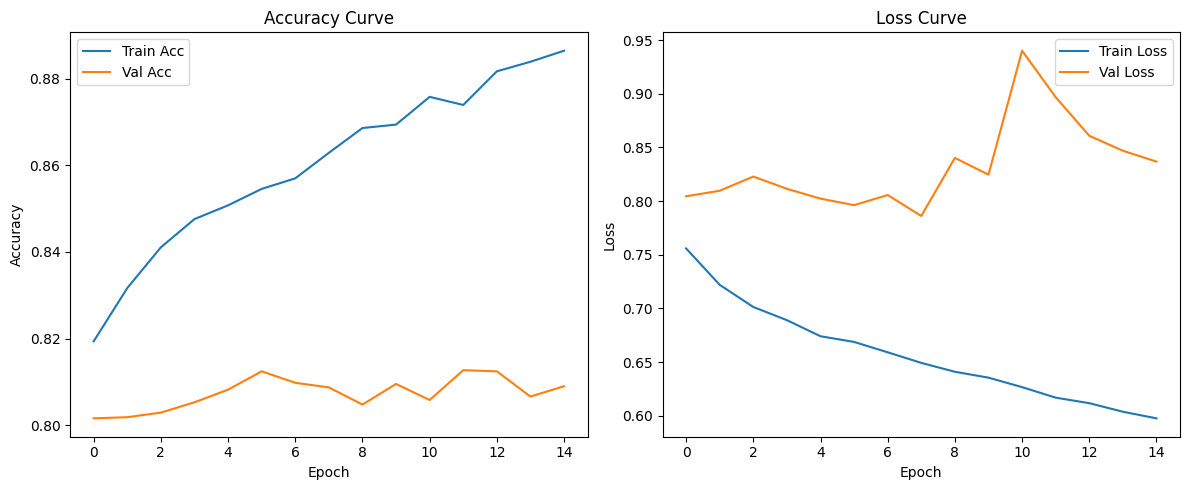

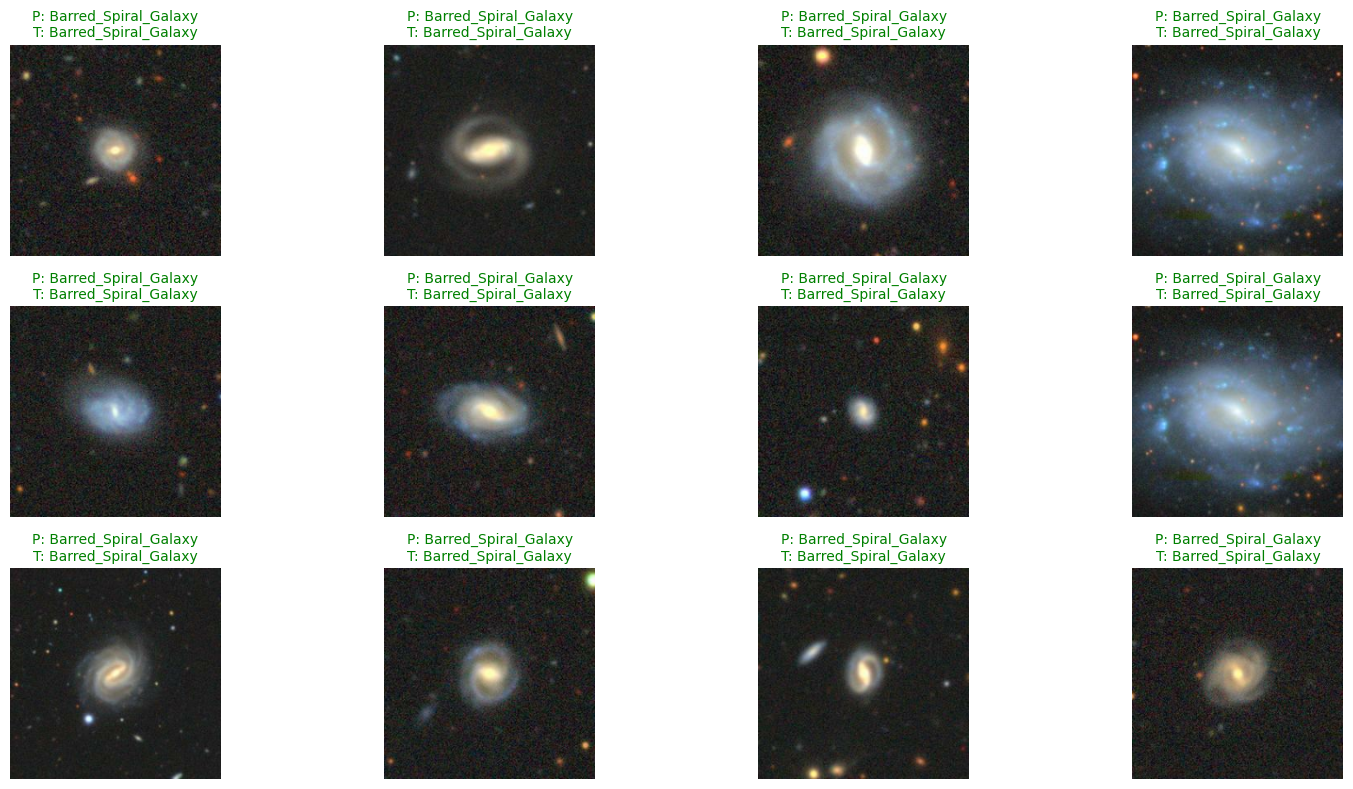

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np, gc, os, matplotlib.pyplot as plt
import h5py, json, random

train_dir = "/kaggle/input/galaxy15/train"
val_dir   = "/kaggle/input/galaxy15/val"
test_dir  = "/kaggle/input/galaxy15/test"

IMG_SIZE   = 224
BATCH_SIZE = 32
AUTOTUNE   = tf.data.AUTOTUNE

train_data_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir, label_mode="categorical",
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    shuffle=True, seed=42
)
val_data_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir, label_mode="categorical",
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    shuffle=False
)
test_data_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir, label_mode="categorical",
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_data_raw.class_names
NUM_CLASSES = len(class_names)

train_data = train_data_raw.cache().shuffle(1000).prefetch(AUTOTUNE)
val_data   = val_data_raw.cache().prefetch(AUTOTUNE)
test_data  = test_data_raw.prefetch(AUTOTUNE)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
], name="data_augmentation")

base_model = tf.keras.applications.EfficientNetB1(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    pooling="avg"
)

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.BatchNormalization(dtype="float32")(x)
x = layers.Dense(512, activation="relu", dtype="float32")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax", dtype="float32")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

cb1 = [
    callbacks.EarlyStopping(patience=4, restore_best_weights=True, monitor="val_accuracy"),
    callbacks.ModelCheckpoint("best_stage1.keras", save_best_only=True, monitor="val_accuracy"),
]

model.fit(train_data, validation_data=val_data, epochs=6, callbacks=cb1, verbose=1)

base_model.trainable = True
for layer in base_model.layers[:150]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=2e-5, weight_decay=1e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=["accuracy"]
)

cb2 = [
    callbacks.EarlyStopping(patience=6, restore_best_weights=True, monitor="val_accuracy"),
    callbacks.ModelCheckpoint("best_stage2.keras", save_best_only=True, monitor="val_accuracy"),
]

history = model.fit(train_data, validation_data=val_data, epochs=15, callbacks=cb2, verbose=1)

model.save("final_galaxy_classifier.keras")
model.save("final_galaxy_classifier.h5")

with h5py.File("final_galaxy_classifier.h5", "a") as f:
    class_json = json.dumps(class_names)
    if "class_names" in f.attrs:
        del f.attrs["class_names"]
    f.attrs["class_names"] = class_json

val_loss, val_acc = model.evaluate(val_data, verbose=0)
test_loss, test_acc = model.evaluate(test_data, verbose=0)

print(f"Validation Accuracy: {val_acc*100:.2f}% | Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}% | Loss: {test_loss:.4f}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

for images, labels in test_data.take(1):
    preds = model.predict(images, verbose=0)
    preds_labels = tf.argmax(preds, axis=1)
    true_labels = tf.argmax(labels, axis=1)
    plt.figure(figsize=(16, 8))
    for i in range(12):
        idx = random.randint(0, len(images)-1)
        img = images[idx].numpy().astype("uint8")
        true_label = class_names[true_labels[idx]]
        pred_label = class_names[preds_labels[idx]]
        color = "green" if true_label == pred_label else "red"
        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.title(f"P: {pred_label}\nT: {true_label}", color=color, fontsize=10)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


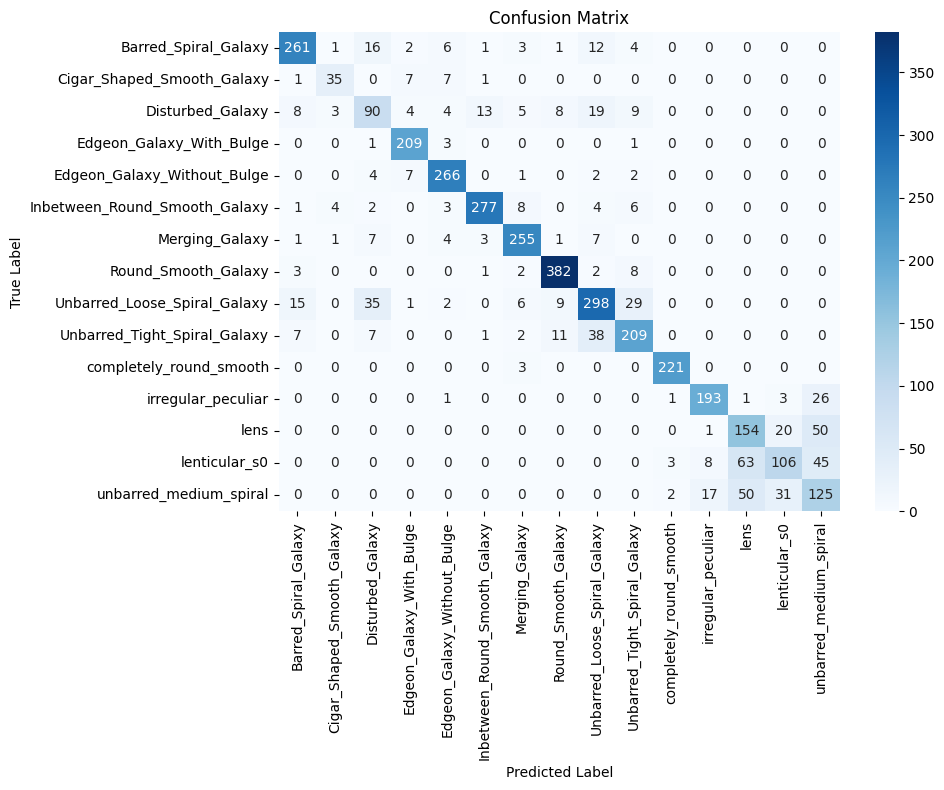


Classification Report:

                               precision    recall  f1-score   support

         Barred_Spiral_Galaxy       0.88      0.85      0.86       307
   Cigar_Shaped_Smooth_Galaxy       0.80      0.69      0.74        51
             Disturbed_Galaxy       0.56      0.55      0.55       163
     Edgeon_Galaxy_With_Bulge       0.91      0.98      0.94       214
  Edgeon_Galaxy_Without_Bulge       0.90      0.94      0.92       282
Inbetween_Round_Smooth_Galaxy       0.93      0.91      0.92       305
               Merging_Galaxy       0.89      0.91      0.90       279
          Round_Smooth_Galaxy       0.93      0.96      0.94       398
 Unbarred_Loose_Spiral_Galaxy       0.78      0.75      0.77       395
 Unbarred_Tight_Spiral_Galaxy       0.78      0.76      0.77       275
      completely_round_smooth       0.97      0.99      0.98       224
           irregular_peculiar       0.88      0.86      0.87       225
                         lens       0.57      0.68 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = []
y_pred = []

for images, labels in test_data:
    preds = model.predict(images, verbose=0)
    y_pred.extend(tf.argmax(preds, axis=1).numpy())
    y_true.extend(tf.argmax(labels, axis=1).numpy())


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:\n")
print(report)


In [ ]:
#hte code used to merge two datasets together and split them into train test and val
import os
import shutil
from sklearn.model_selection import train_test_split

source1 = "/kaggle/input/galaxy10decals"
source2 = "/kaggle/input/gz2"
target_root = "/kaggle/working/galaxy15"

train_dir = os.path.join(target_root, "train")
val_dir   = os.path.join(target_root, "val")
test_dir  = os.path.join(target_root, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def merge_and_split(source, class_name):
    img_paths = [os.path.join(source, class_name, f) 
                 for f in os.listdir(os.path.join(source, class_name)) 
                 if f.lower().endswith((".jpg", ".jpeg", ".png"))]

    train_files, temp_files = train_test_split(img_paths, test_size=0.30, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.50, random_state=42)

    for subset, files in [("train", train_files), ("val", val_files), ("test", test_files)]:
        out_dir = os.path.join(target_root, subset, class_name)
        os.makedirs(out_dir, exist_ok=True)
        for f in files:
            shutil.copy(f, out_dir)


for cname in os.listdir(source1):
    merge_and_split(source1, cname)

for cname in os.listdir(source2):
    merge_and_split(source2, cname)

print("Finished merging and splitting Galaxy15 dataset.")
